In [1]:
!pip install pytrends

In [2]:
# download font file มาก่อน
# !wget https://awards.opdc.go.th/awards_opdc/assets/fonts/THSarabunNew/THSarabunNew.ttf
!rm THSarabunChula-Regular.ttf
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

rm: cannot remove 'THSarabunChula-Regular.ttf': No such file or directory


In [3]:
from pytrends.request import TrendReq
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = fm.fontManager.addfont('THSarabunChula-Regular.ttf')
plt.rc('font', family='TH Sarabun Chula')
# fm.fontManager.ttflist.extend(font_list)

pytrends = TrendReq()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
kw_list = ["แมว"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='TH', gprop='')

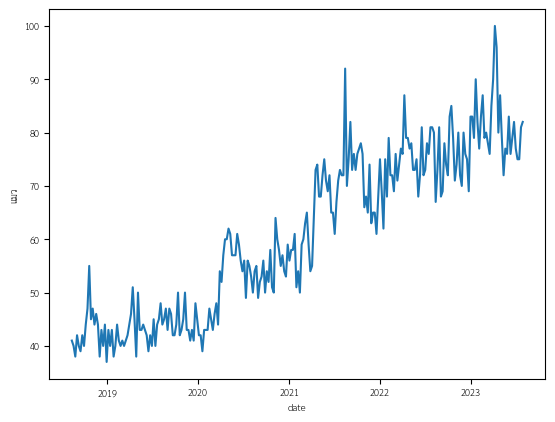

In [5]:
df = pytrends.interest_over_time()
df = df.reset_index()
ax = sns.lineplot(data=df, x='date', y='แมว')

In [6]:
seed_kw = 'แมว'
kw_list = [seed_kw]
pytrends.build_payload(kw_list, cat=0, timeframe='today 1-m', geo='TH', gprop='')

queries = pytrends.related_queries()
df_results = pd.DataFrame(queries.get(seed_kw).get('top')['query'])
df_results['keyword'] = seed_kw

In [7]:
kw_list = df_results['query'].head(5).to_list()
original_kw_list = kw_list
kw_list = [kw.replace(seed_kw, "") for kw in kw_list]
kw_list = [kw.replace(" ","") for kw in kw_list]
kw_dict = dict(zip(kw_list, original_kw_list))

pytrends.build_payload(kw_list, cat=0, timeframe='today 1-m', geo='TH', gprop='')
expanded_queries = pytrends.related_queries()

for keyword in kw_list:
    if bool(expanded_queries.get(keyword)):
        df_temp = pd.DataFrame(expanded_queries.get(keyword).get('top')['query'])
        df_temp['keyword'] = kw_dict.get(keyword)
        
        df_results = df_results.append(df_temp)
        print(keyword)
        print(df_temp)

อาหาร
                  query    keyword
0            ร้าน อาหาร  อาหาร แมว
1        อาหาร ใกล้ ฉัน  อาหาร แมว
2   ร้าน อาหาร ใกล้ ฉัน  อาหาร แมว
3             อาหาร ไทย  อาหาร แมว
4            เมนู อาหาร  อาหาร แมว
5           อาหาร เสริม  อาหาร แมว
6             อาหาร แมว  อาหาร แมว
7             สาร อาหาร  อาหาร แมว
8            อาหาร ทะเล  อาหาร แมว
9            อาหาร เช้า  อาหาร แมว
10    อาหาร ภาษา อังกฤษ  อาหาร แมว
11        อาหาร ญี่ปุ่น  อาหาร แมว
12       อาหาร ตาม สั่ง  อาหาร แมว
13          อาหาร สัตว์  อาหาร แมว
14     ร้าน อาหาร อร่อย  อาหาร แมว
15        กระเพาะ อาหาร  อาหาร แมว
16            อาหาร จีน  อาหาร แมว
17   ร้าน อาหาร ญี่ปุ่น  อาหาร แมว
18         อาหาร เกาหลี  อาหาร แมว
19            รูป อาหาร  อาหาร แมว
20            อาหาร หมา  อาหาร แมว
21           อาหาร เย็น  อาหาร แมว
22          อาหาร สุนัข  อาหาร แมว
23      ระบบ ย่อย อาหาร  อาหาร แมว
24         อาหาร 5 หมู่  อาหาร แมว
ลูก
                                   query  keyword
0                             

/tmp/ipykernel_20/653839757.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_temp)
/tmp/ipykernel_20/653839757.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_temp)
/tmp/ipykernel_20/653839757.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_temp)
/tmp/ipykernel_20/653839757.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append(df_temp)
/tmp/ipykernel_20/653839757.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

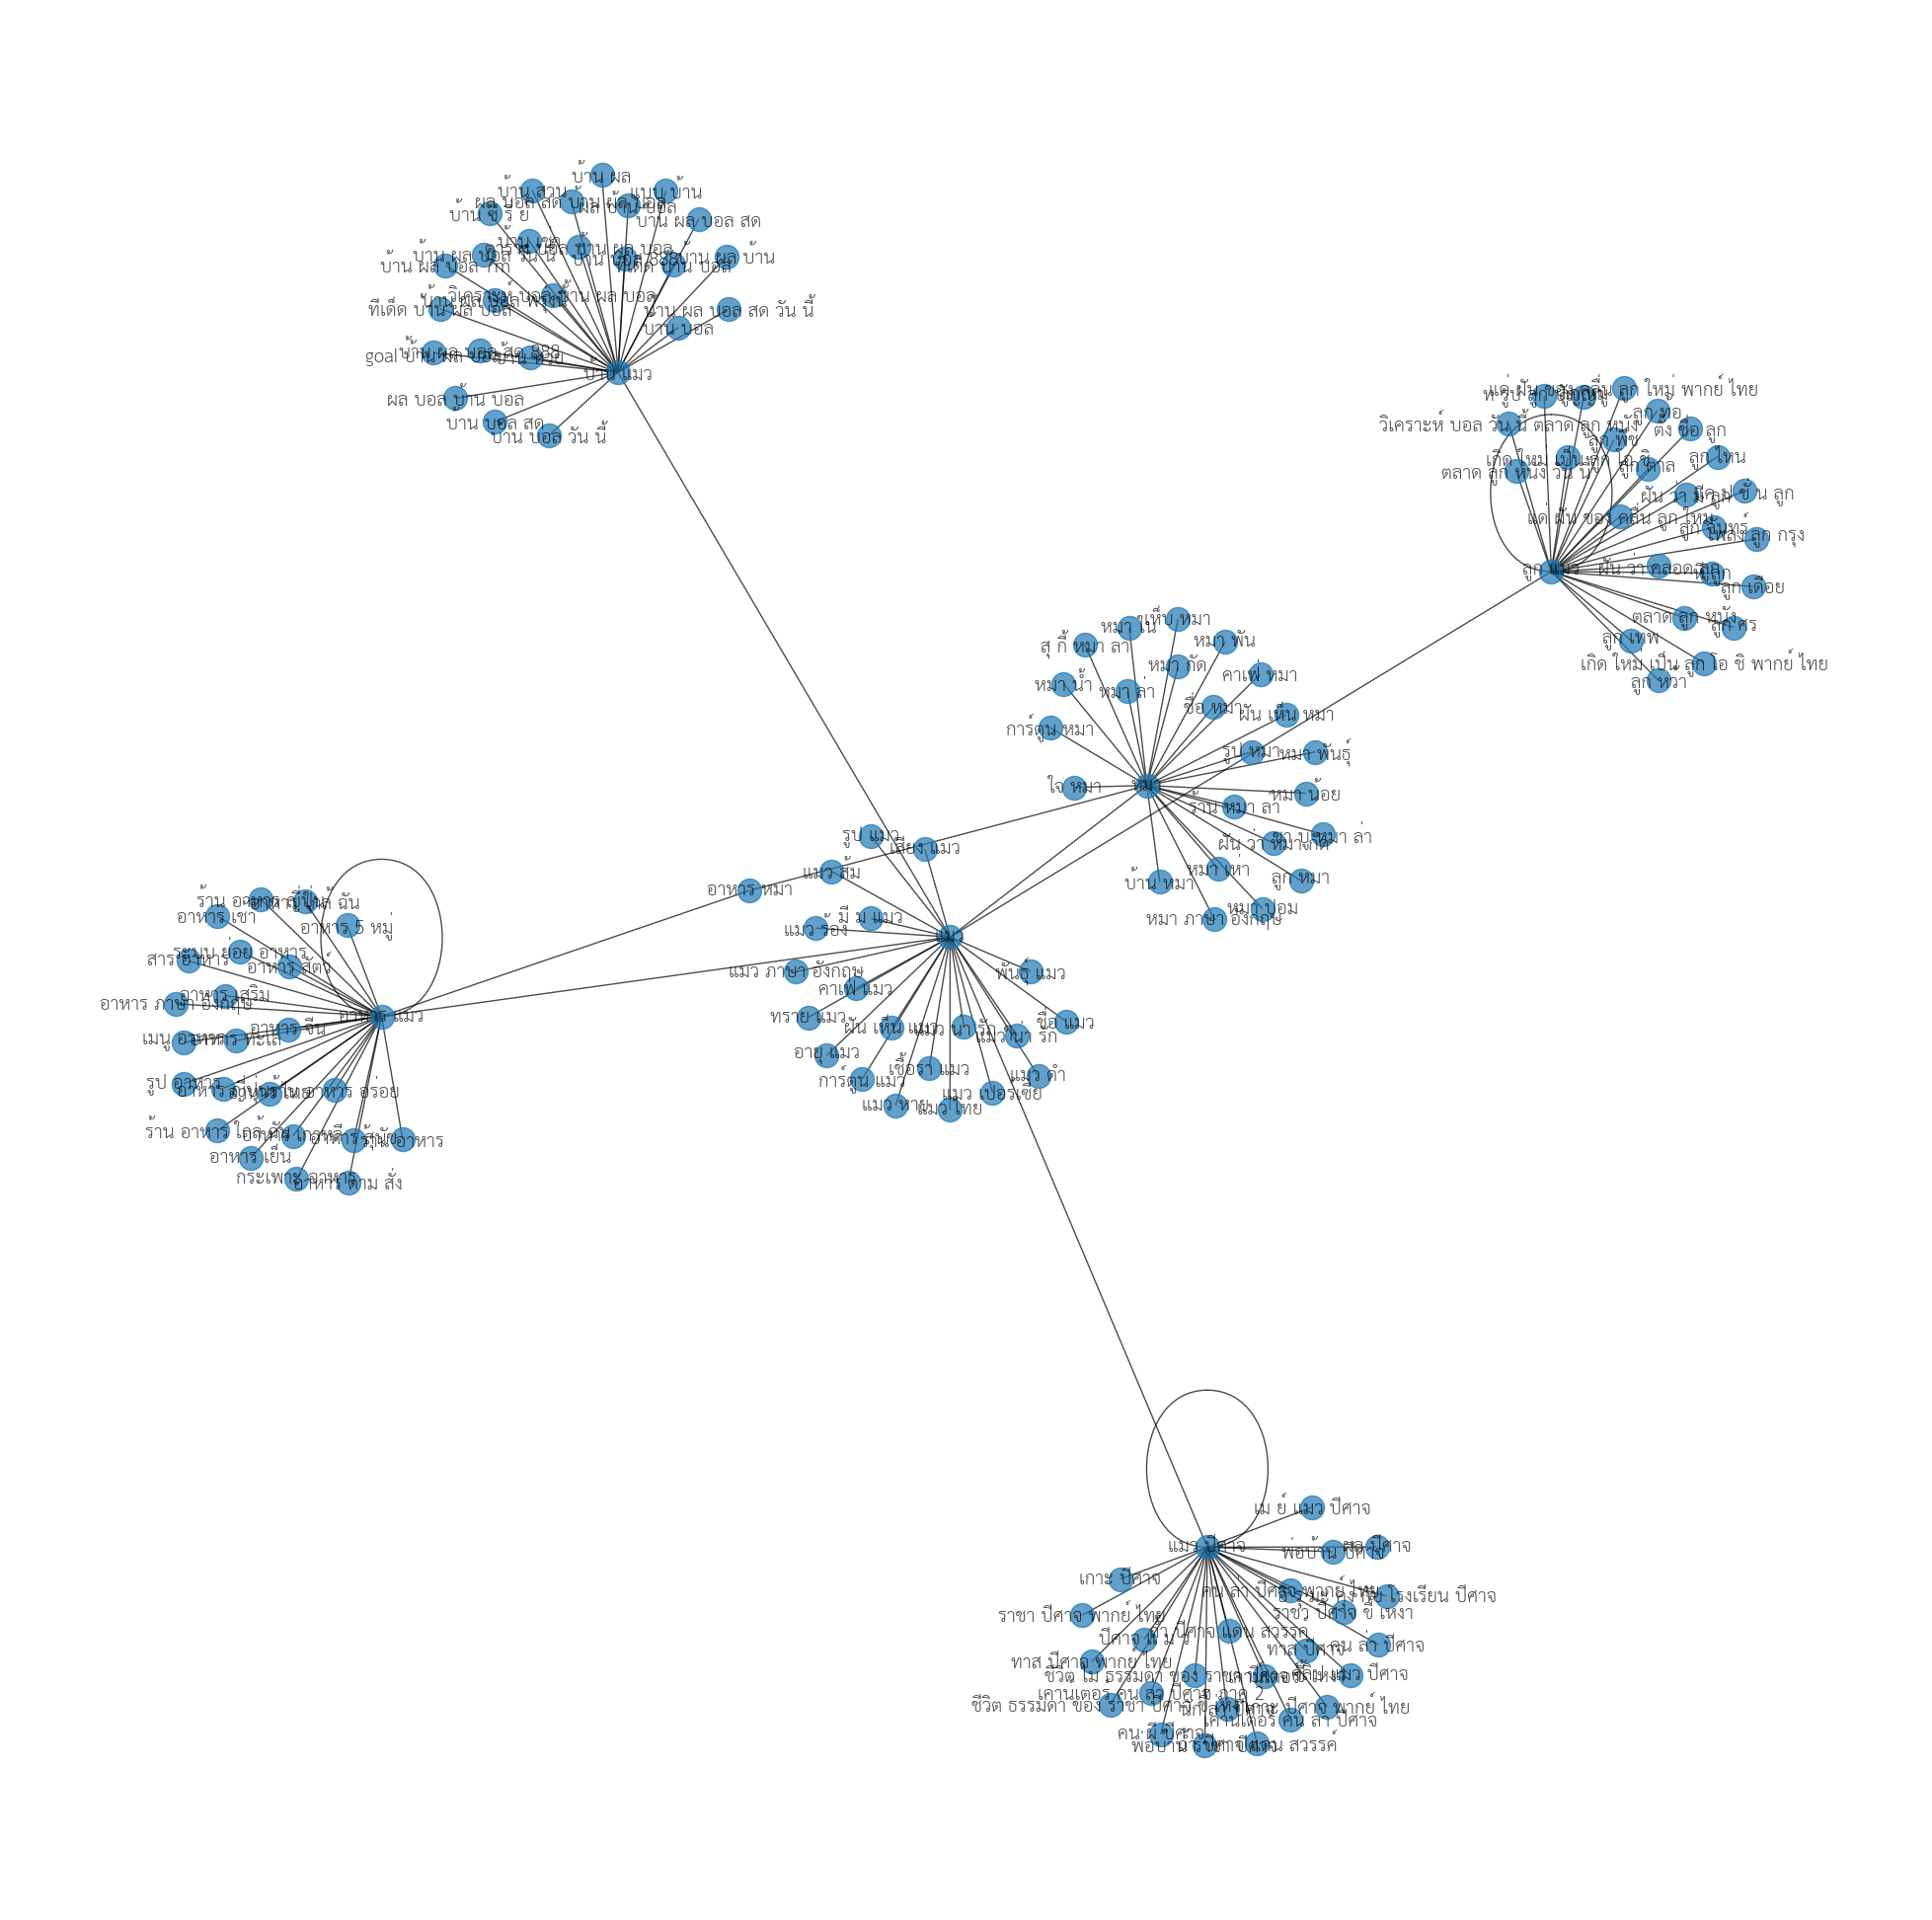

<Figure size 640x480 with 0 Axes>

In [8]:
import networkx as nx

fig, ax = plt.subplots(figsize=(25,25))

G=nx.from_pandas_edgelist(df_results,source='keyword',target='query')

labels_params = {"font_family":"TH Sarabun Chula",
                    "alpha":.7,
                     "font_size":20
                }

nx.draw_spring(G, with_labels=True, **labels_params,)
plt.show()
plt.savefig('search_network.png')